In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
Attempt_to_commit_rape_I_V  = pd.read_csv('Rape_Data/Attempt_to_commit_rape_I_V.csv')
Attempt_to_commit_rape_I_V.head(4)

,State/UT,Attempt to Commit Rape (Total)(I),Attempt to Commit Rape (Total)(V),A) Women (18 Yrs. And above)(I),A) Women (18 Yrs. And above)(I).1,B) Girls (Below 18 yrs))(I),B) Girls (Below 18 yrs))(I).1
0,Andhra Pradesh,191,192,144,144,47,48
1,Arunachal Pradesh,11,12,5,5,6,7
2,Assam,527,527,525,525,2,2
3,Bihar,110,110,105,105,5,5


In [4]:
CrimeAgainstWomen  = pd.read_csv('Rape_Data/CrimeAgainstWomen_Total_2016-18.csv')
CrimeAgainstWomen.head(4)

,State/UT,2016,2017,2018,Percentage State Share To All-India (2018),Mid-Year Projected Female Population (In Lakhs) (2018)+,Rate of Total Crime against Women (2018)++
0,Andhra Pradesh,16362,17909,16438,4.3,260.0,63.2
1,Arunachal Pradesh,367,337,368,0.1,7.2,51.1
2,Assam,20869,23082,27728,7.3,167.0,166.0
3,Bihar,13400,14711,16920,4.5,567.4,29.8


In [5]:
Custodial_rape = pd.read_csv('Rape_Data/Custodial_rape.csv')
Custodial_rape.head(4)

,State/UT,Punishment for Rape (Sec.376 & 376(I),Rape in Custody (Total),By Police Personnel (Sec.376(2) (a),By Public Servant (Sec.376(2) (b),By Member of Armed Forces (Sec.376(2) (c),By Management/Staff of Jail/Remand Home/Place of Custody (Sec.376(2)(d),By Management/ Staff of Hospital (Sec.376(2) (e)
0,Andhra Pradesh,578,6,3,0,0,1,2
1,Arunachal Pradesh,42,0,0,0,0,0,0
2,Assam,1476,1,1,0,0,0,0
3,Bihar,625,0,0,0,0,0,0


In [6]:
Disposal_CrimeHead_Wise_2018 =pd.read_csv('Rape_Data/Disposal(CrimeHead-Wise)-2018.csv')
Disposal_CrimeHead_Wise_2018.head(4)

,Crime Head,Persons Arrested Male,Persons Arrested Female,Persons Arrested Total,Persons Chargesheeted Male,Persons Chargesheeted Female,Persons Chargesheeted Total,Persons Convicted Male,Persons Convicted Female,Persons Convicted Total,Persons Discharged Male,Persons Discharged Female,Persons Discharged Total,Persons Acquitted Male,Persons Acquitted Female,Persons Acquitted Total
0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,POCSO Act Section 4 & 6,25641,605,26246,23673,465,24138,3037,20,3057,356,2,358,5333,86,5419
2,POCSO Act Section 8 & 10,16980,164,17144,16005,131,16136,1918,8,1926,144,1,145,2581,10,2591
3,Rape,40225,892,41117,36737,776,37513,5921,48,5969,1996,26,2022,14177,214,14391


In [7]:
Non_custodial_rape = pd.read_csv('Rape_Data/Non_custodial_rape.csv')
Non_custodial_rape.head(4)

,State/UT,Rape Other than Custodial (Total),By Relative/Guardian/Teacher/person in position of trust (Sec.376(2) (f),On Pregnant Women (Sec.376(2) (h),On Women Below 16 years of age (Sec.376(2) (i),On Women Incapable of giving Consent (Sec.376(2) (j),By Persons in Control or Dominance over women (Sec.376(2) (k),On Women with Mental or Physical disability (Sec.376(2)(l),Endanger life of Women after Rape (Sec.376(2)(m),Repeated Rape on same women (Sec.376(2)(n),Other Custo- dial Rapes,Punishment upto 20 years extended to life for Rape (Below 16 Yrs) (Sec.376(3)),Punishment for causing Death (Sec.376(A))
0,Andhra Pradesh,297,19,0,108,0,1,9,0,79,81,59,1
1,Arunachal Pradesh,22,4,0,15,1,0,1,0,1,0,0,0
2,Assam,148,90,0,10,0,43,0,0,0,5,0,0
3,Bihar,17,11,0,0,0,0,2,0,1,3,0,0


In [8]:
Police_Disposal_CrimeHead_Wise_2018 = pd.read_csv('Rape_Data/Police_Disposal(CrimeHead-Wise)-2018.csv')
Police_Disposal_CrimeHead_Wise_2018.head(5)

,,,,,,,,,,,<<<<<<< HEAD
Crime Head,Cases Pending Investigation from Previous Year,Cases Reported during the year,Cases Reopened for Investigation,Total Cases for Investigation,Cases Not Investigated Under 157_1_b CRPC,Cases True but Insufficient Evidence or Untraced or No Clue,Cases Abated during Investigation,Total,Cases Charge_sheeted Out of Cases from Previous Year,Cases Charge_sheeted Out of Cases during the Year,Cases Charge_sheeted
2,3,4,5,6,7,13,14,15,16,17,18
POCSO Act Section 4 & 6,7761,21401,2,29164,1,360,42,817,4538,15006,19544
POCSO Act Section 8 & 10,5507,14124,10,19641,0,294,5,774,2845,9652,12497
Rape,13762,33356,21,47139,1,1093,75,4841,7054,21415,28469


In [9]:
punished_rapists = pd.read_csv('Rape_Data/punished_rapists.csv')
punished_rapists.head(5)

,State/UT,By Seperated husband (Sec.376 (B)),Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DA)),By Person in Authority (Sec.376 (C)),Gang Rape (Sec.376(D)),Rape/Gang Rape of Girl Below 12 Yrs (Imprisonment for life till death) (Sec.376(DB)),Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DB)),Punishment for Repeat offenders (Sec.376(E)),Rape (Total) (Sec.376 IPC)
0,Andhra Pradesh,0,13,1,12,0,4,0,971
1,Arunachal Pradesh,0,0,0,1,2,0,0,67
2,Assam,2,0,0,20,1,0,0,1648
3,Bihar,0,0,0,8,1,0,0,651
4,Chhattisgarh,0,14,1,38,4,10,6,2091


In [10]:
Rape_under_Different_age_groups_2018 = pd.read_csv('Rape_Data/Rape_under_Different_age_groups_2018.csv')
Rape_under_Different_age_groups_2018.head(5)

,State/UT,Cases Reported,Below 6 Years,6 Years & Above (Below 12 Years),12 Years & Above(Below 16 Years),16 Years & Above(Below 18 Years ),Total Girl /Child Victims(Below 18),18 Years & Above( Below 30 Years ),30 Years & Above (Below 45 Years),45 Years & Above(Below 60 Years),60 Years & Above,Total Women / Adult Victims(Above 18),Total Victims
0,Andhra Pradesh,971,16,57,181,251,505,373,76,14,5,468,973
1,Arunachal Pradesh,67,4,4,13,11,32,29,9,0,0,38,70
2,Assam,1648,7,24,6,52,89,1043,523,107,5,1678,1767
3,Bihar,651,0,0,1,3,4,520,111,16,0,647,651
4,Chhattisgarh,2091,41,80,557,541,1219,644,190,42,6,882,2101


In [11]:
RapeCommited_I_V =pd.read_csv('Rape_Data/RapeCommited_I_V.csv')
RapeCommited_I_V.head(5)

,State/UT,Rape (Total)(I),Rape (Total)(V),Women (18 Yrs. And above)(I),Women (18 Yrs. And above)(V),Girls (Below 18 yrs)(I),Girls (Below 18 yrs)(V)
0,Andhra Pradesh,971,973,468,468,503,505
1,Arunachal Pradesh,67,70,38,38,29,32
2,Assam,1648,1767,1559,1678,89,89
3,Bihar,651,651,647,647,4,4
4,Chhattisgarh,2091,2101,876,882,1215,1219


In [12]:
Rapist_Victim_relation  = pd.read_csv('Rape_Data/Rapist_Victim_relation.csv')
Rapist_Victim_relation.head(5)

,State/UT,Cases Offender known to Victim (Total),Family members,Family Friends/ Neighbours/ Employer or Other Known Persons,Friends/Online-Friends or Live in Partners on Pretext of Marriage/Seperated Husband,Cases Offenders Unknown or Not Identified,Total Rape Cases (Known+unknown Offenders),Percentage Share of Known Cases to Total Rape Cases
0,Andhra Pradesh,912,64,474,374,59,971,93.9
1,Arunachal Pradesh,63,11,33,19,4,67,94.0
2,Assam,1488,141,784,563,160,1648,90.3
3,Bihar,639,7,219,413,12,651,98.2
4,Chhattisgarh,1915,136,796,983,176,2091,91.6


In [13]:
#Attempt to commmit Q1
grouped_data_Atcr = Attempt_to_commit_rape_I_V.groupby('State/UT')['Attempt to Commit Rape (Total)(I)'].sum()
highest_state = grouped_data_Atcr.idxmax()
highest_count = grouped_data_Atcr.max()
lowest_state = grouped_data_Atcr.idxmin()
lowest_count = grouped_data_Atcr.min()
print(" highest count: ",highest_count,"\n highest state: ",highest_state,"\n lowest count: ",lowest_count,"\n lowest state: ",lowest_state)

 highest count:  944 
 highest state:  West Bengal 
 lowest count:  0 
 lowest state:  A&N Islands


In [14]:
#Attempt to commmit Q2
Attempt_to_commit_rape_I_V['diff'] = Attempt_to_commit_rape_I_V['Attempt to Commit Rape (Total)(V)']-Attempt_to_commit_rape_I_V['Attempt to Commit Rape (Total)(I)']


In [15]:
max_diff = Attempt_to_commit_rape_I_V['diff'].max()
Attempt_to_commit_rape_I_V['State/UT'][Attempt_to_commit_rape_I_V['diff']==max_diff]

30    Chandigarh
Name: State/UT, dtype: object

In [53]:
Attempt_to_commit_rape_I_V.columns

Index(['State/UT', 'Attempt to Commit Rape (Total)(I)',
       'Attempt to Commit Rape (Total)(V)', 'A) Women (18 Yrs. And above)(I)',
       'A) Women (18 Yrs. And above)(I).1', 'B) Girls (Below 18 yrs))(I)',
       'B) Girls (Below 18 yrs))(I).1', 'diff'],
      dtype='object')

In [54]:
#attempt to commit Q7
attempts_below_18 = Attempt_to_commit_rape_I_V[['State/UT','A) Women (18 Yrs. And above)(I)' ,'B) Girls (Below 18 yrs))(I)']]
sorted_data = attempts_below_18.sort_values(by=['B) Girls (Below 18 yrs))(I)', 'A) Women (18 Yrs. And above)(I)'], ascending=False)

top_5_states = sorted_data.head(5)
print("Top 5 states or UTs with the highest number of attempted rape incidents (I) for age below 18:")
print(top_5_states[['State/UT', 'B) Girls (Below 18 yrs))(I)']])


Top 5 states or UTs with the highest number of attempted rape incidents (I) for age below 18:
          State/UT  B) Girls (Below 18 yrs))(I)
26   Uttar Pradesh                          144
0   Andhra Pradesh                           47
20          Punjab                           44
10       Jharkhand                           38
21       Rajasthan                           37


In [17]:
punished_rapists.head(5)

,State/UT,By Seperated husband (Sec.376 (B)),Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DA)),By Person in Authority (Sec.376 (C)),Gang Rape (Sec.376(D)),Rape/Gang Rape of Girl Below 12 Yrs (Imprisonment for life till death) (Sec.376(DB)),Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DB)),Punishment for Repeat offenders (Sec.376(E)),Rape (Total) (Sec.376 IPC)
0,Andhra Pradesh,0,13,1,12,0,4,0,971
1,Arunachal Pradesh,0,0,0,1,2,0,0,67
2,Assam,2,0,0,20,1,0,0,1648
3,Bihar,0,0,0,8,1,0,0,651
4,Chhattisgarh,0,14,1,38,4,10,6,2091


In [18]:
punished_rapists.columns

Index(['State/UT', 'By Seperated husband (Sec.376 (B))',
       'Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DA))',
       'By Person in Authority (Sec.376 (C))', 'Gang Rape (Sec.376(D))',
       'Rape/Gang Rape of Girl Below 12 Yrs (Imprisonment for life till death) (Sec.376(DB))',
       'Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DB))',
       'Punishment for Repeat offenders (Sec.376(E))',
       'Rape (Total) (Sec.376 IPC)'],
      dtype='object')

In [19]:
#Punished_rapists Q

max_values = {}
for column in punished_rapists.columns[1:]:
    max_row = punished_rapists.loc[punished_rapists[column].idxmax()]
    state = max_row['State/UT']
    value = max_row[column]
    
    max_values[column] = {'State/UT': state, 'Max Value': value}

max_values_df = pd.DataFrame.from_dict(max_values, orient='index')
print("Table with the maximum value for each attribute and its corresponding state:")
print(max_values_df)


Table with the maximum value for each attribute and its corresponding state:
                                                          State/UT  Max Value
By Seperated husband (Sec.376 (B))                         Haryana         14
Rape/Gang Rape of Girl Below 16 Yrs (Imprisonme...  Madhya Pradesh         56
By Person in Authority (Sec.376 (C))                     Jharkhand         35
Gang Rape (Sec.376(D))                                   Rajasthan        556
Rape/Gang Rape of Girl Below 12 Yrs (Imprisonme...         Tripura          9
Rape/Gang Rape of Girl Below 16 Yrs (Imprisonme...       Rajasthan         51
Punishment for Repeat offenders (Sec.376(E))        Madhya Pradesh        132
Rape (Total) (Sec.376 IPC)                          Madhya Pradesh       5433


In [20]:
#Punished_rapists Que; Is there any notable trend or pattern in the distribution of these different categories of rape cases across states/UTs?



In [21]:
Disposal_CrimeHead_Wise_2018.head(6)

,Crime Head,Persons Arrested Male,Persons Arrested Female,Persons Arrested Total,Persons Chargesheeted Male,Persons Chargesheeted Female,Persons Chargesheeted Total,Persons Convicted Male,Persons Convicted Female,Persons Convicted Total,Persons Discharged Male,Persons Discharged Female,Persons Discharged Total,Persons Acquitted Male,Persons Acquitted Female,Persons Acquitted Total
0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,POCSO Act Section 4 & 6,25641,605,26246,23673,465,24138,3037,20,3057,356,2,358,5333,86,5419
2,POCSO Act Section 8 & 10,16980,164,17144,16005,131,16136,1918,8,1926,144,1,145,2581,10,2591
3,Rape,40225,892,41117,36737,776,37513,5921,48,5969,1996,26,2022,14177,214,14391
4,Murder with Rape/Gang Rape,409,14,423,332,12,344,36,0,36,1,0,1,31,2,33


In [22]:
#Disposal_CrimeHead_Wise_2018 Single concept Que

In [23]:
#Disposal_CrimeHead_Wise_2018 Single concept Que

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


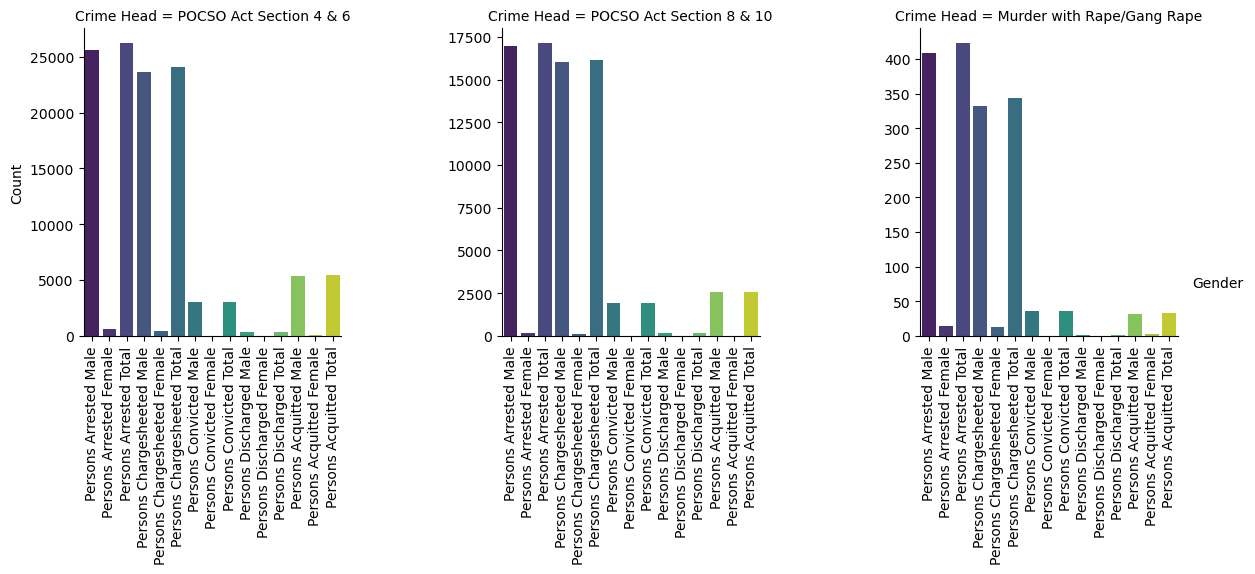

In [24]:
crime_head_categories = ["POCSO Act Section 4 & 6", "POCSO Act Section 8 & 10", "Murder with Rape/Gang Rape"]

filtered_data = Disposal_CrimeHead_Wise_2018[Disposal_CrimeHead_Wise_2018['Crime Head'].isin(crime_head_categories)]

# Melt the DataFrame to reshape it for plotting with FacetGrid
melted_data = pd.melt(filtered_data, id_vars=['Crime Head'], var_name='Gender', value_name='Count')

# Create a FacetGrid
g = sns.FacetGrid(melted_data, col='Crime Head', col_wrap=3, height=4, sharey=False)

# Plot the data
g.map(sns.barplot, 'Gender', 'Count', hue_order=['Persons Arrested Male', 'Persons Arrested Female',
                                                  'Persons Chargesheeted Male', 'Persons Chargesheeted Female',
                                                  'Persons Convicted Male', 'Persons Convicted Female',
                                                  'Persons Discharged Male', 'Persons Discharged Female',
                                                  'Persons Acquitted Male', 'Persons Acquitted Female']
                                                  , palette='viridis')

# Customize the plot
g.set_axis_labels("", "Count")
g.add_legend(title="Gender")
g.set_xticklabels(rotation=90)
# Show the plot
plt.show()


In [25]:
Rape_under_Different_age_groups_2018.head(6)

,State/UT,Cases Reported,Below 6 Years,6 Years & Above (Below 12 Years),12 Years & Above(Below 16 Years),16 Years & Above(Below 18 Years ),Total Girl /Child Victims(Below 18),18 Years & Above( Below 30 Years ),30 Years & Above (Below 45 Years),45 Years & Above(Below 60 Years),60 Years & Above,Total Women / Adult Victims(Above 18),Total Victims
0,Andhra Pradesh,971,16,57,181,251,505,373,76,14,5,468,973
1,Arunachal Pradesh,67,4,4,13,11,32,29,9,0,0,38,70
2,Assam,1648,7,24,6,52,89,1043,523,107,5,1678,1767
3,Bihar,651,0,0,1,3,4,520,111,16,0,647,651
4,Chhattisgarh,2091,41,80,557,541,1219,644,190,42,6,882,2101
5,Goa,61,0,1,21,12,34,13,11,2,1,27,61


In [26]:
Rape_under_Different_age_groups_2018.columns

Index(['State/UT ', 'Cases Reported ', 'Below 6 Years ',
       '6 Years & Above (Below 12 Years) ', '12 Years & Above(Below 16 Years)',
       '16 Years & Above(Below 18 Years )',
       'Total Girl /Child Victims(Below 18)',
       '18 Years & Above( Below 30 Years )',
       '30 Years & Above (Below 45 Years)', '45 Years & Above(Below 60 Years)',
       '60 Years & Above ', 'Total Women / Adult Victims(Above 18)',
       'Total Victims '],
      dtype='object')

In [61]:
sorted_age_group_df = Rape_under_Different_age_groups_2018.sort_values(by ='Total Victims ', ascending=False)

In [62]:
sorted_age_group_df['Below_18'] = sorted_age_group_df['Below 6 Years '] + sorted_age_group_df['6 Years & Above (Below 12 Years) '] + sorted_age_group_df['12 Years & Above(Below 16 Years)'] + sorted_age_group_df['16 Years & Above(Below 18 Years )']
sorted_age_group_df['18_to_45'] = sorted_age_group_df['18 Years & Above( Below 30 Years )'] + sorted_age_group_df['30 Years & Above (Below 45 Years)']
sorted_age_group_df['45_and_above'] = sorted_age_group_df['45 Years & Above(Below 60 Years)'] + sorted_age_group_df['60 Years & Above ']

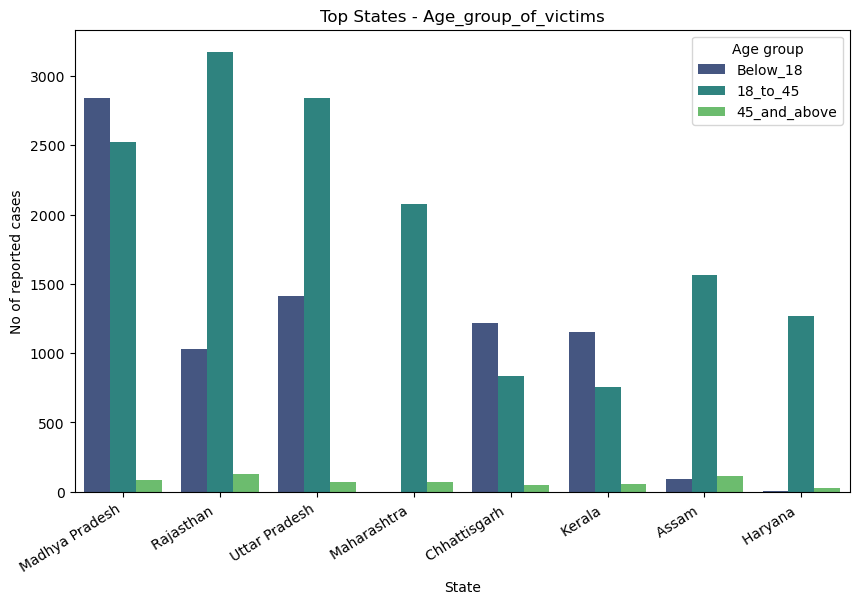

In [80]:
data = sorted_age_group_df
data = data.head(8)
data= data[['State/UT ', 'Below_18', '18_to_45','45_and_above']]
melted_data = pd.melt(data, id_vars=['State/UT '], var_name='Attribute', value_name='Value')

vibrant_palette = sns.color_palette('husl', len(data['State/UT ']))

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='State/UT ', y='Value', hue='Attribute', data=melted_data, palette='viridis')
plt.title('Top States - Age_group_of_victims')
plt.ylabel('No of reported cases')
plt.xlabel('State')
plt.xticks(rotation=32, ha='right')
plt.legend(title='Age group')
plt.show()

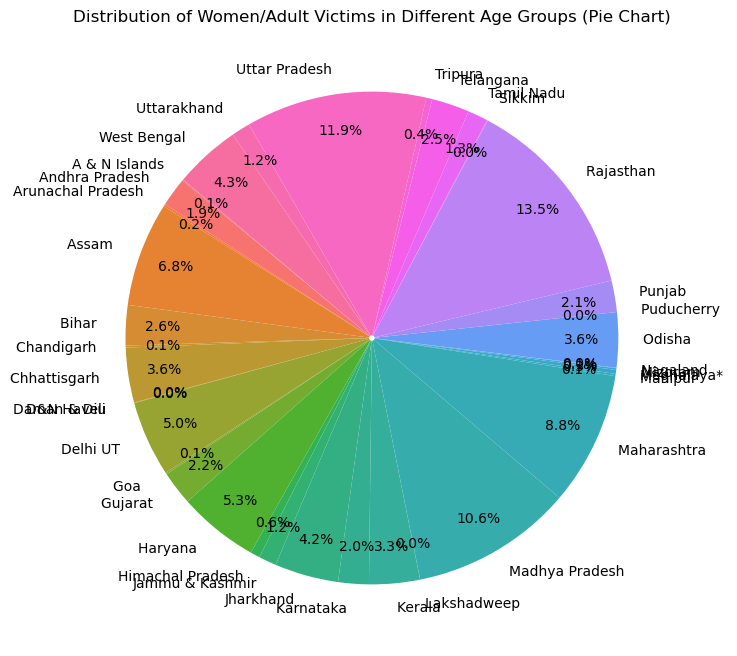

In [92]:
import seaborn as sns

# Assuming "Rape_under_Different_age_groups_2018" is your DataFrame

# Select relevant columns for analysis
age_group_columns = ['State/UT ', '18 Years & Above( Below 30 Years )', '30 Years & Above (Below 45 Years)',
                      '45 Years & Above(Below 60 Years)', '60 Years & Above ', 'Total Women / Adult Victims(Above 18)']

# Create a new DataFrame with relevant columns
age_group_data = Rape_under_Different_age_groups_2018[age_group_columns]

# Calculate the distribution of women/adult victims in different age groups
age_group_distribution = age_group_data.groupby('State/UT ').sum()

# Define a custom color palette
custom_palette = sns.color_palette("husl", len(age_group_distribution))

# Plot a pie chart with custom colors and adjusted percentage position
plt.figure(figsize=(12, 8))
plt.pie(age_group_distribution['Total Women / Adult Victims(Above 18)'],
        labels=age_group_distribution.index,
        autopct=lambda p: '{:.1f}%'.format(p),
        startangle=140,
        pctdistance=0.85,
        colors=custom_palette)

# Adjust the position of the percentage values outside the pie chart
plt.gca().add_artist(plt.Circle((0, 0), 0.011, fc='white'))

plt.title('Distribution of Women/Adult Victims in Different Age Groups (Pie Chart)')
plt.show()


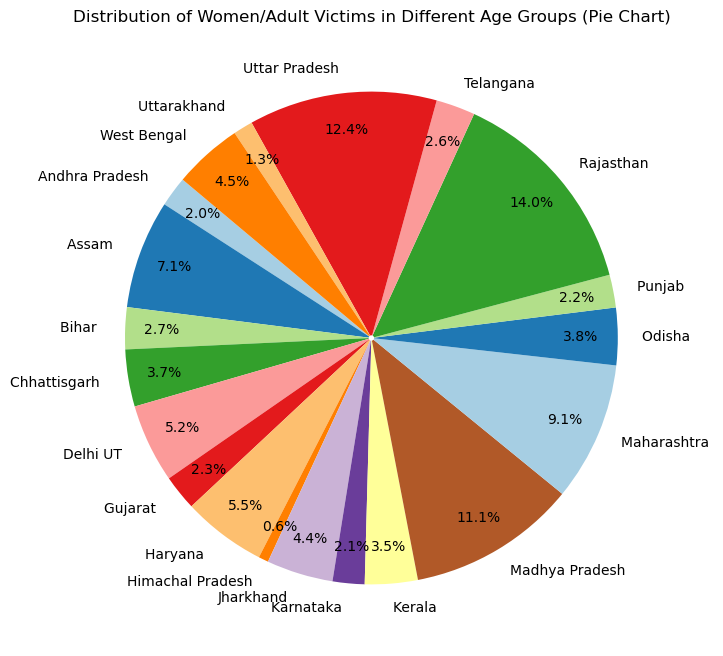

In [93]:
#Pie chart
age_group_data = Rape_under_Different_age_groups_2018.sort_values(by ='Total Victims ', ascending=False)
# Calculate the distribution of women/adult victims in different age groups
age_group_data = age_group_data.head(20)
age_group_distribution = age_group_data.groupby('State/UT ').sum()

# Define a custom color palette
custom_palette = sns.color_palette("Paired", len(age_group_distribution))

# Plot a pie chart with custom colors and adjusted percentage position
plt.figure(figsize=(12, 8))
plt.pie(age_group_distribution['Total Women / Adult Victims(Above 18)'],
        labels=age_group_distribution.index,
        autopct=lambda p: '{:.1f}%'.format(p),
        startangle=140,
        pctdistance=0.85,
        colors=custom_palette)
# Adjust the position of the percentage values outside the pie chart
plt.gca().add_artist(plt.Circle((0, 0), 0.011, fc='white'))

plt.title('Distribution of Women/Adult Victims in Different Age Groups (Pie Chart)')
plt.show()

In [28]:
Rapist_Victim_relation.head(6)

,State/UT,Cases Offender known to Victim (Total),Family members,Family Friends/ Neighbours/ Employer or Other Known Persons,Friends/Online-Friends or Live in Partners on Pretext of Marriage/Seperated Husband,Cases Offenders Unknown or Not Identified,Total Rape Cases (Known+unknown Offenders),Percentage Share of Known Cases to Total Rape Cases
0,Andhra Pradesh,912,64,474,374,59,971,93.9
1,Arunachal Pradesh,63,11,33,19,4,67,94.0
2,Assam,1488,141,784,563,160,1648,90.3
3,Bihar,639,7,219,413,12,651,98.2
4,Chhattisgarh,1915,136,796,983,176,2091,91.6
5,Goa,57,5,21,31,4,61,93.4


<h3> Factors possibly co-related to rape counts:</h3>

  * Sex ratio
  * Literacy rate
  * population density
  * unemployment rate
  

In [ ]:
Population